<a href="https://colab.research.google.com/github/Lolo-17/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [470]:
# importing libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [131]:
# Lester-handmade calculator of mean, variance,
# deviation, covariance and correlation coefficient
def getstats(values, values1):
  # For first dataset
  # mean, var and std
  array = values.sum()
  num = len(values)
  mean = array/num
  var = (((values-mean)**2).sum())/num
  sd = math.sqrt(var)
  # For second dataset
  # mean, var and std
  array1 = values1.sum()
  num1 = len(values1)
  mean1 = array1/num1
  var1 = (((values1-mean1)**2).sum())/num1
  sd1 = math.sqrt(var1)
  # Get covariance between first
  # and second dataset
  n = (len(values)+len(values))/2
  cov = ((values*values1).sum())/n - mean*mean1
  # Get the correlation coefficient
  r = cov/(math.sqrt(var)*math.sqrt(var1))
  return mean, var, sd, mean1, var1, sd1, cov, r

In [132]:
# Creating last week sales in a numpy 
# array and displaying mean, var 
# and std
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

# Saving sales and number of customer
# calculations onto a variable
stat = getstats(sales, cust_num)
print("Sales Mean:", stat[0],
      "\nSales Variance:", stat[1],
      "\nSales Standard Deviation", stat[2])

Sales Mean: 3052.714285714286 
Sales Variance: 183761.06122448976 
Sales Standard Deviation 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [136]:
# Creating number of customers in a numpy 
# array and displaying covariance between
# sales and number of customers
cust_num = np.array([127, 80, 105, 92, 120, 115, 93])
print("Covariance:", stat[6])

Covariance: 6518.020408163255


In [143]:
# Saving both datasets into a dataframe
store = {'Sales': sales, 'Cust Num': cust_num}
store_stats = pd.DataFrame(store)

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [139]:
# Displaying correlation coefficient
# between sales and number of customers
print('Correlation Coefficient:', stat[7])

Correlation Coefficient: 0.9628339778148893


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
# Reading the titanic data, saving it to a variable,
# dropping redundant column and displaying first 5 rows
td = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
td = td.drop('Unnamed: 0', axis=1)
ph = {'Age': td['age'], 'Fare': td['fare'], 'Body': td['body']}
df = pd.DataFrame(ph)
print(td.shape)
td.head()

In [ ]:
# Exploring data
td.describe()

In [ ]:
# Exploring data
td.describe(exclude='number')

In [ ]:
# Exploring data
td.dtypes

In [206]:
# Displaying variance covariance matrix
df.cov()

,Age,Fare,Body
Age,165.850021,114.416613,81.622922
Fare,114.416613,2678.959738,-179.164684
Body,81.622922,-179.164684,9544.688567


In [207]:
# Displaying correlation matrix
df.corr()

,Age,Fare,Body
Age,1.000000,0.171892,0.059059
Fare,0.171892,1.000000,-0.043110
Body,0.059059,-0.043110,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Othorgonal synonym = **perpendicular**

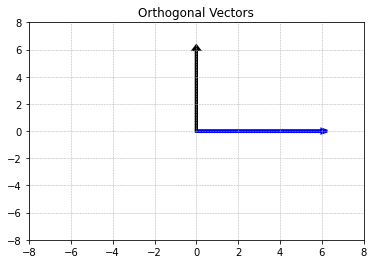

In [287]:
# Plotting two orthogonal vectors
v1 = [6, 0]
v2 = [0, 6]
plt.arrow(0,0, v1[0], v1[1], 
          lw=3, head_width=.25, head_length=.25, color='blue')
plt.arrow(0,0, v2[0], v2[1], 
          lw=3, head_width=.25, head_length=.25, color='black')
plt.xlim(-8,8)          
plt.ylim(-8,8)
plt.title('Orthogonal Vectors')
plt.grid(axis='both', ls='--', lw=.5)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [225]:
# Checking if A and B are orthogonal
A = np.array([-5, 3, 7])
B = np.array([6, -8, 2])
(A*B).sum()

# Since the dot product is not 0 and instead is [-40],
# vectors A and B are not orthogonal

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [477]:
# Answering above questions below
# in print
C = np.array([2, 15, 6, 20])
CT = C.T
print('||c||2 is', np.sqrt(C**2).sum())
print('c⋅c is', np.vdot(C,C))
print('cTc is', np.matmul(C, CT))


||c||2 is 43.0
c⋅c is 665
cTc is 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} + 12\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 7 \\ 12 \end{bmatrix} + 11\begin{bmatrix} 7 \\ 12 \end{bmatrix} + (-8)\begin{bmatrix} 7 \\ 12 \end{bmatrix} = 2\hat{i} + 11\hat{j}+ (-8)\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [348]:
# Turning f into a unit vector
F = np.array([4,12,11,9,2])
sq = (np.sqrt(F**2).sum())
for v in F:
  uv = v/sq
  print(np.array([uv]))

[0.10526316]
[0.31578947]
[0.28947368]
[0.23684211]
[0.05263158]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

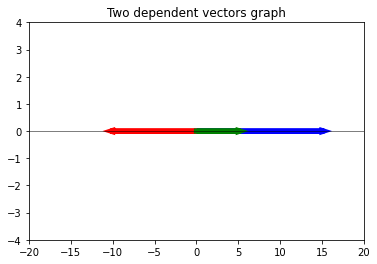

In [362]:
# First two dependent vectors graph

v1 = [5,0]

plt.xlim(-20, 20)          
plt.ylim(-4, 4)
v2 = np.multiply(3, v1)
v3 = np.multiply(-2, v1)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals
plt.plot(x_vals, y_vals, ls='-', color='black', linewidth=.50)
plt.arrow(0,0, v2[0], v2[1], lw=5, head_width=.05, head_length=0.25, color ='blue')
plt.arrow(0,0, v3[0], v3[1], lw=5, head_width=.05, head_length=0.25, color ='red')
plt.arrow(0,0, v1[0], v1[1], lw=5, head_width=.05, head_length=0.25, color ='green')
plt.title("Two dependent vectors graph")
plt.show()

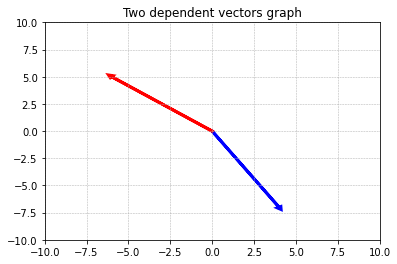

In [372]:
# Second two dependent vectors graph

a = [4, -7] 
b = [-6, 5]
plt.xlim(-10,10)          
plt.ylim(-10,10)
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.25, head_length=0.25, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.25, head_length=0.25, color ='red')
plt.grid(axis='both', ls='--', lw=.5)

plt.title("Two dependent vectors graph")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

[3 6]
[ 8 16]
[11 22]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


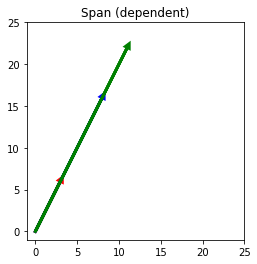

In [474]:
G = np.array([1,2])
H = np.array([4,8])
plt.xlim(-1,25)          
plt.ylim(-1,25)
i_hat = 3*np.array([1,2])
j_hat = 2*np.array([4,8])
c = 3*np.array([1,2]) + 2*np.array([4,8])
plt.axes().set_aspect('equal')
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.5, head_length=.5, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.5, head_length=.5, color ='blue')
plt.arrow(0, 0, c[0], c[1], linewidth=3, head_width=.5, head_length=.5, color ='green')
plt.title("Span (dependent)")
print(i_hat)
print(j_hat)
print(c)
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

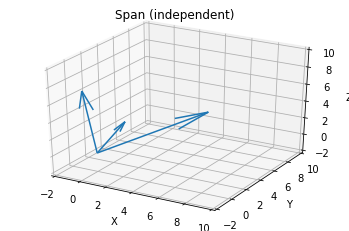

In [475]:
L = np.array([1,2,3])
M = np.array([-1,0,7])
N = np.array([4,8,2])

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-2, 10])
ax.set_ylim([-2, 10])
ax.set_zlim([-2, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Span (independent)')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


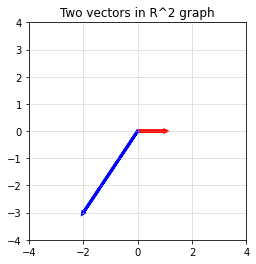

In [400]:
Q = np.array([[1,0],[-2,-3]])
plt.xlim(-4,4)          
plt.ylim(-4,4)
plt.axes().set_aspect('equal')
plt.arrow(0, 0, Q[0][0], Q[0][1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, Q[1][0], Q[1][1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(axis='both', ls='--', lw=.5)
plt.title("Two vectors in R^2 graph")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space  V  is a set of vectors that are linearly independent and that span the vector space  V .

A set of vectors spans a space if their linear combinations fill the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [391]:
# Getting the rank of P
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank 3 tells us that P is linear independent.

# Stretch Goal #1
## Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal #2

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

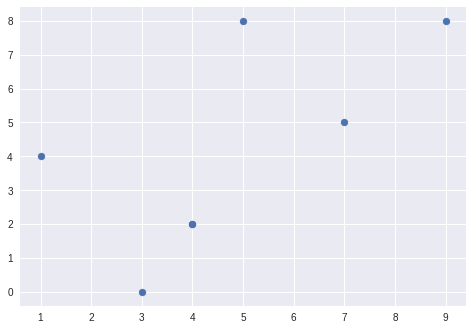

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()